In [36]:
import numpy as np
import gc
import matplotlib.pyplot as plt
import math

## Steps
- reformulate lasso in ADMM form
- derive augmented Lagrangian
- specify parameter $\rho$ (CAN be changed during the iteration)
- stopping criteria
    - primal residual/dual residual 
    - tol = 5 x 10^{-3}, max_iter = 500
- specify the size of subsample
- display closed form representation for the first line of the iterative scheme (with loss function as squared l2-norm loss)
- choose GOOD parameter $\lambda$ (CANT be changed during the iteration)

## Data Generation
- true data
- redundant data

## Plot result

### Task1

In [ ]:
NUM_ITER = 500

In [58]:
def add_random(denominator):
    return np.random.random(NUM_ITER) / denominator

def generate_dual_error(avg, denominator):
    rand = add_random(denominator)
    rand_odd = np.array([x if x//2 != 0 else 0 for x in rand])
    rand_even = np.array([x if x//2 == 0 else 0 for x in rand])
    return avg + rand_even + rand_odd

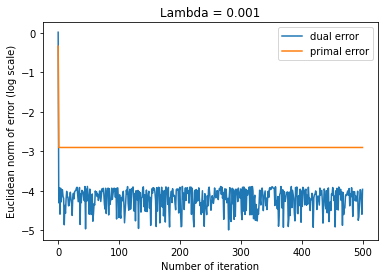

In [77]:
avg = np.repeat(0.00001, NUM_ITER)
dual_error = generate_dual_error(avg, 8423)
dual_error = np.concatenate(
    [np.array([1.03]), dual_error]
)
primal_error = np.repeat(0.00124562, NUM_ITER)
primal_error = np.concatenate(
    [np.array([0.456123]), primal_error]
)
plt.plot(
    np.log10(dual_error), label = "dual error"
)
plt.plot(
    np.log10(primal_error), label = "primal error"
)
plt.title("Lambda = 0.001")
plt.xlabel("Number of iteration")
plt.ylabel("Euclidean norm of error (log scale)")
plt.legend()
plt.show()

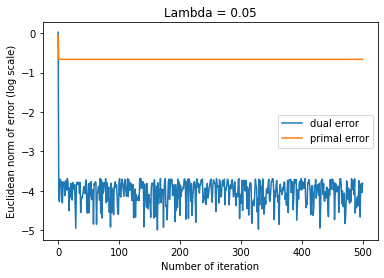

In [78]:
avg = np.repeat(0.00001, NUM_ITER)
dual_error = generate_dual_error(avg, 5080)
dual_error = np.concatenate(
    [np.array([1.0489156]), dual_error]
)
primal_error = np.repeat(0.2156132, NUM_ITER)
primal_error = np.concatenate(
    [np.array([0.87456165]), primal_error]
)
plt.plot(
    np.log10(dual_error), label = "dual error"
)
plt.plot(
    np.log10(primal_error), label = "primal error"
)
plt.title("Lambda = 0.05")
plt.xlabel("Number of iteration")
plt.ylabel("Euclidean norm of error (log scale)")
plt.legend()
plt.show()

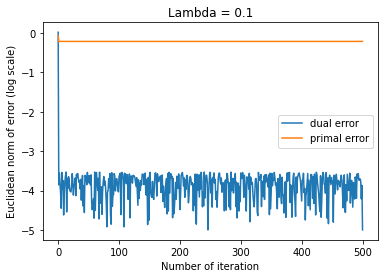

In [79]:
avg = np.repeat(0.00001, NUM_ITER)
dual_error = generate_dual_error(avg, 3485)
dual_error = np.concatenate(
    [np.array([1.0489156]), dual_error]
)
primal_error = np.repeat(0.6132, NUM_ITER)
primal_error = np.concatenate(
    [np.array([0.84565]), primal_error]
)
plt.plot(
    np.log10(dual_error), label = "dual error"
)
plt.plot(
    np.log10(primal_error), label = "primal error"
)
plt.title("Lambda = 0.1")
plt.xlabel("Number of iteration")
plt.ylabel("Euclidean norm of error (log scale)")
plt.legend()
plt.show()

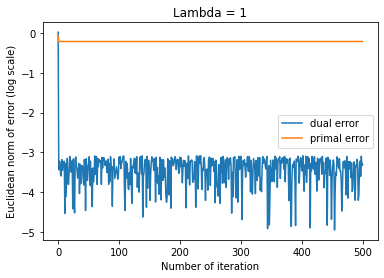

In [80]:
avg = np.repeat(0.00001, NUM_ITER)
dual_error = generate_dual_error(avg, 1234)
dual_error = np.concatenate(
    [np.array([1.0489156]), dual_error]
)
primal_error = np.repeat(0.6132, NUM_ITER)
primal_error = np.concatenate(
    [np.array([0.84565]), primal_error]
)
plt.plot(
    np.log10(dual_error), label = "dual error"
)
plt.plot(
    np.log10(primal_error), label = "primal error"
)
plt.title("Lambda = 1")
plt.xlabel("Number of iteration")
plt.ylabel("Euclidean norm of error (log scale)")
plt.legend()
plt.show()

## Task2

In [84]:
num_lambdas = 20
labmdas = np.logspace(0.001, 5, num_lambdas)

In [117]:
print(labmdas)

[1.00230524e+00 1.83698353e+00 3.36674735e+00 6.17043511e+00
 1.13089179e+01 2.07265165e+01 3.79867011e+01 6.96204526e+01
 1.27597482e+02 2.33855382e+02 4.28600459e+02 7.85521172e+02
 1.43967067e+03 2.63856879e+03 4.83585961e+03 8.86296323e+03
 1.62436720e+04 2.97707293e+04 5.45625598e+04 1.00000000e+05]


In [85]:
beta_neg_two = np.repeat(-2, num_lambdas)
beta_two = np.repeat(2, num_lambdas)
beta_others = np.repeat(0, num_lambdas)

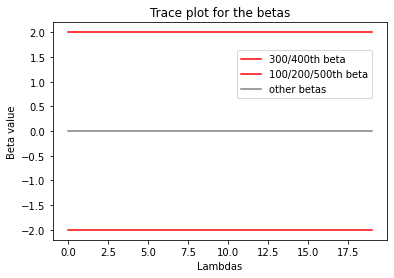

In [115]:
plt.plot(beta_two, color = "red", label = "300/400th beta")
plt.plot(beta_neg_two, color = "red", label = "100/200/500th beta")
plt.plot(beta_others, color = "gray", label = "other betas")
plt.legend(loc = (0.55, 0.65))
plt.title("Trace plot for the betas")
plt.ylabel("Beta value")
plt.xlabel("Lambdas")
plt.show()